In [1]:
!pip install pandas plotnine 
# installation of plotline to make use of ggplot

In [2]:
from plotnine import * 
import pandas as pd
import numpy as np
from sklearn import linear_model # necessary package for linear regression

import seaborn as sns
import matplotlib.pyplot as plt #for visualization
from sklearn.model_selection import train_test_split #for ml training and tesing split
from sklearn.linear_model import LinearRegression  
from sklearn import tree # package for decision tree
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [3]:
with open('yield_df.csv') as file:
    df = pd.read_csv(file)
print(df.dtypes)
print(df)


Unnamed: 0      int64
Country        object
Crop           object
Year            int64
yield           int64
avg_rain      float64
pesticide     float64
avg_temp      float64
dtype: object
       Unnamed: 0   Country            Crop  Year  yield  avg_rain  pesticide  \
0               0   Albania           Maize  1990  36613    1485.0     121.00   
1               1   Albania        Potatoes  1990  66667    1485.0     121.00   
2               2   Albania     Rice, paddy  1990  23333    1485.0     121.00   
3               3   Albania         Sorghum  1990  12500    1485.0     121.00   
4               4   Albania        Soybeans  1990   7000    1485.0     121.00   
...           ...       ...             ...   ...    ...       ...        ...   
28237       28237  Zimbabwe     Rice, paddy  2013  22581     657.0    2550.07   
28238       28238  Zimbabwe         Sorghum  2013   3066     657.0    2550.07   
28239       28239  Zimbabwe        Soybeans  2013  13142     657.0    2550.07   


In [4]:
with open('rainfall.csv') as file:
    df1 = pd.read_csv(file)
print(df1.dtypes)
print(df1)

 Area                            object
Year                              int64
average_rain_fall_mm_per_year    object
dtype: object
             Area  Year average_rain_fall_mm_per_year
0     Afghanistan  1985                           327
1     Afghanistan  1986                           327
2     Afghanistan  1987                           327
3     Afghanistan  1989                           327
4     Afghanistan  1990                           327
...           ...   ...                           ...
6722     Zimbabwe  2013                           657
6723     Zimbabwe  2014                           657
6724     Zimbabwe  2015                           657
6725     Zimbabwe  2016                           657
6726     Zimbabwe  2017                           657

[6727 rows x 3 columns]


In [5]:
len(df1['Year'].unique())

31

In [6]:
with open('pesticides.csv') as file:
    df2 = pd.read_csv(file)
print(df2.dtypes)
print(df2)

Domain      object
Area        object
Element     object
Item        object
Year         int64
Unit        object
Value      float64
dtype: object
              Domain      Area Element                Item  Year  \
0     Pesticides Use   Albania     Use  Pesticides (total)  1990   
1     Pesticides Use   Albania     Use  Pesticides (total)  1991   
2     Pesticides Use   Albania     Use  Pesticides (total)  1992   
3     Pesticides Use   Albania     Use  Pesticides (total)  1993   
4     Pesticides Use   Albania     Use  Pesticides (total)  1994   
...              ...       ...     ...                 ...   ...   
4344  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2012   
4345  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2013   
4346  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2014   
4347  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2015   
4348  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2016   

                              Unit  

In [7]:
with open('temp.csv') as file:
    df3 = pd.read_csv(file)
print(df3.dtypes)
print(df3)

year          int64
country      object
avg_temp    float64
dtype: object
       year         country  avg_temp
0      1849  CÃ´te D'Ivoire     25.58
1      1850  CÃ´te D'Ivoire     25.52
2      1851  CÃ´te D'Ivoire     25.67
3      1852  CÃ´te D'Ivoire       NaN
4      1853  CÃ´te D'Ivoire       NaN
...     ...             ...       ...
71306  2009          Mexico     21.76
71307  2010          Mexico     20.90
71308  2011          Mexico     21.55
71309  2012          Mexico     21.52
71310  2013          Mexico     22.19

[71311 rows x 3 columns]


In [8]:
with open('yield.csv') as file:
    df4 = pd.read_csv(file)
print(df4.dtypes)
print(df4)

Domain Code     object
Domain          object
Area Code        int64
Area            object
Element Code     int64
Element         object
Item Code        int64
Item            object
Year Code        int64
Year             int64
Unit            object
Value            int64
dtype: object
      Domain Code Domain  Area Code         Area  Element Code Element  \
0              QC  Crops          2  Afghanistan          5419   Yield   
1              QC  Crops          2  Afghanistan          5419   Yield   
2              QC  Crops          2  Afghanistan          5419   Yield   
3              QC  Crops          2  Afghanistan          5419   Yield   
4              QC  Crops          2  Afghanistan          5419   Yield   
...           ...    ...        ...          ...           ...     ...   
56712          QC  Crops        181     Zimbabwe          5419   Yield   
56713          QC  Crops        181     Zimbabwe          5419   Yield   
56714          QC  Crops        181     Zimb

In [9]:
#In initial steps, I started with data preproccessing to check if there are null values in the dataset. Furthermore, some feature names (column names) were renamed for better readability and understanding.

In [10]:
df.isna().sum()

Unnamed: 0    0
Country       0
Crop          0
Year          0
yield         0
avg_rain      0
pesticide     0
avg_temp      0
dtype: int64

In [11]:
df=df.dropna(axis=0, how='all')  #dropping all rows where are completely empty
null_data = df.isnull().sum() #summing up all null vales
print(null_data) #printing the data
#There is no NA and NULL values in the dataset. It is a clean dataset
df=df.drop(['Unnamed: 0'], axis=1) #removing the first column from the dataset
print('\n \nAfter renaming \n\n')
df.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)
print(df.dtypes) #above line I have renamed few columns for better usability then printed
#Since, my data was already clean, I have still checked for if there is any null value.

Unnamed: 0    0
Country       0
Crop          0
Year          0
yield         0
avg_rain      0
pesticide     0
avg_temp      0
dtype: int64

 
After renaming 


Country       object
Crop          object
Year           int64
yield          int64
avg_rain     float64
pesticide    float64
avg_temp     float64
dtype: object


In [12]:
df.groupby(['Country'],sort=True)['yield'].sum().nlargest(100)

Country
India         327420324
Brazil        167550306
Mexico        130788528
Japan         124470912
Australia     109111062
                ...    
Estonia         3595638
Namibia         3165475
Sudan           1896346
Montenegro      1645100
Eritrea         1452416
Name: yield, Length: 100, dtype: int64

In [13]:
df.groupby(['Crop','Country'],sort=True)['yield'].sum().nlargest(100)

Crop                  Country       
Cassava               India             142810624
Potatoes              India              92122514
                      Brazil             49602168
                      United Kingdom     46705145
                      Australia          45670386
                                          ...    
                      Greece              4630351
Cassava               Argentina           4604308
Plantains and others  El Salvador         4567920
Potatoes              Mali                4500039
Maize                 Chile               4481252
Name: yield, Length: 100, dtype: int64

In [14]:
#India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

#from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

In [15]:
#Next step involves exploratory data analysis.
#Firstly, I explored the relationships between all the features (column names) of the dataset, a good way to quickly check correlations among columns by visualizing the correlation matrix as a heatmap.

C:\Users\smitd\AppData\Local\Temp\ipykernel_3228\810835816.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


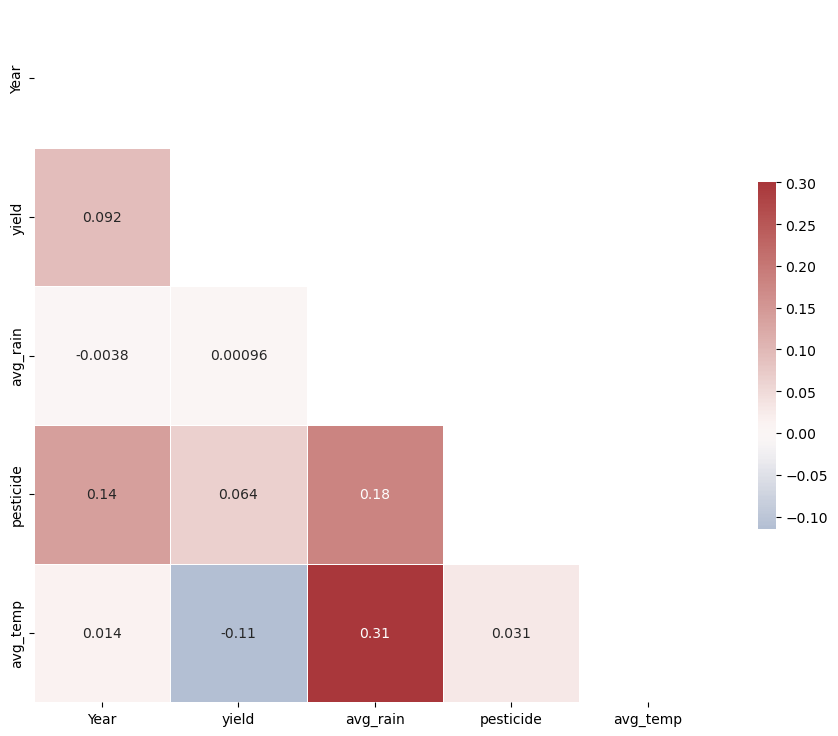

In [16]:
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
#It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

In [18]:
#It can be observed from the correlation matrix that there is no significant correlation among the features (column names).
#Next, I visualized crop-wise total yield. Using this, we can visualize magnitude of yield among different crops.

                   Crop      yield
6              Soybeans   53924312
5               Sorghum   56634127
2  Plantains and others   58958974
9                  Yams   96676873
8                 Wheat  116158445
4           Rice, paddy  137994713
1                 Maize  149633801
0               Cassava  307730510
7        Sweet potatoes  344077024
3              Potatoes  854351426


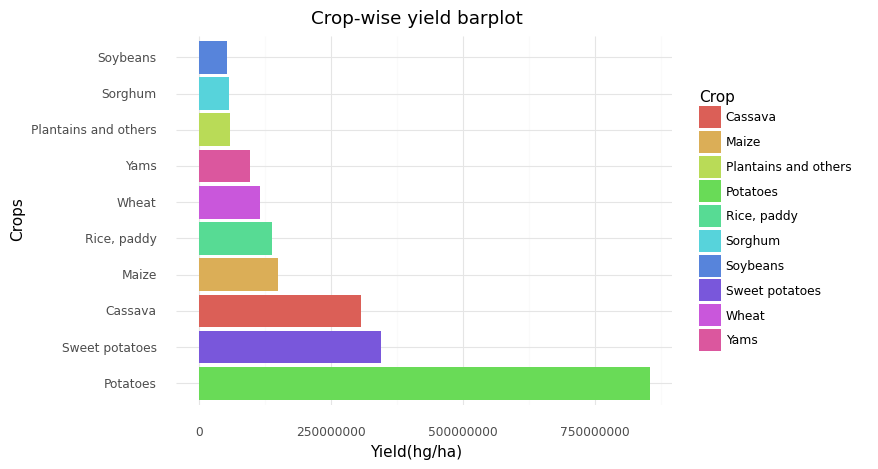

<ggplot: (108978317565)>

In [19]:
#Representation of crop as per yield 
df1=df.groupby(['Crop'])['yield'].aggregate('sum').reset_index(name='yield') #creation of dataframe based on cropwise yield
df_1=df1.sort_values(by=['yield']) #Sorting of values as per order of yield
print(df_1) #printing

p=ggplot(df_1, aes(x='Crop',y='yield',fill='Crop'))+ geom_bar(stat="identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_1['Crop'].tolist()[::-1]) #plotting yield and crop using ggplot
p=p+guides( )#removing redundant legends 
p+labs(title = "Crop-wise yield barplot",x = "Crops", y = "Yield(hg/ha)") #adding up title and labels to thr x and y axis

In [20]:
#The next plot helped us to visualize increase in usage of pesticides over the years. This would help us check later if this feature has any impact on yield or not. 

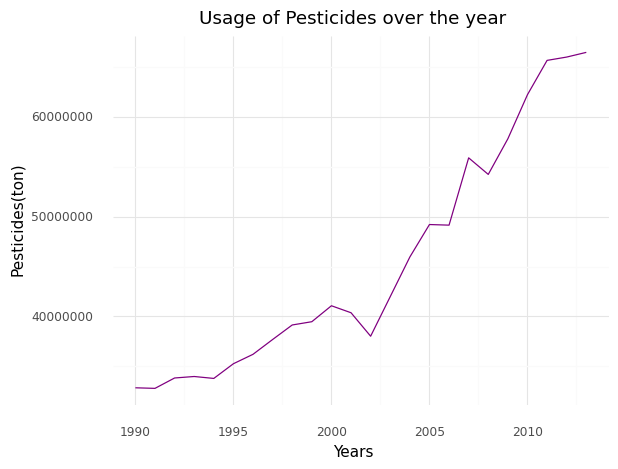

<ggplot: (108978393986)>

In [21]:
#visualization of how use of pesticides increased in years
df_py=df.groupby(['Year'])['pesticide'].aggregate('sum').reset_index(name='pesticide') #creating dataframe yearwise total pesticide used
#df_1=df1.sort_values(by=[''], ascending=False)
#print(df_1)
ggplot(df_py, aes('Year','pesticide'))+ geom_line(colour='purple')+theme_minimal()+labs(title = "Usage of Pesticides over the year",x = "Years", y = "Pesticides(ton)")
#ploting pasticide vs year using ggplot, changing of colour,theme, title, labels for better visualization

In [22]:
#om the above plot it could be inferred that usage of pesticides has increased drastically over time. I wondered if there is any impact on crop yield due to this increased pesticide usage with time.
#Therefore, I visualized changes in crop-wise yield over time using a line-plot.

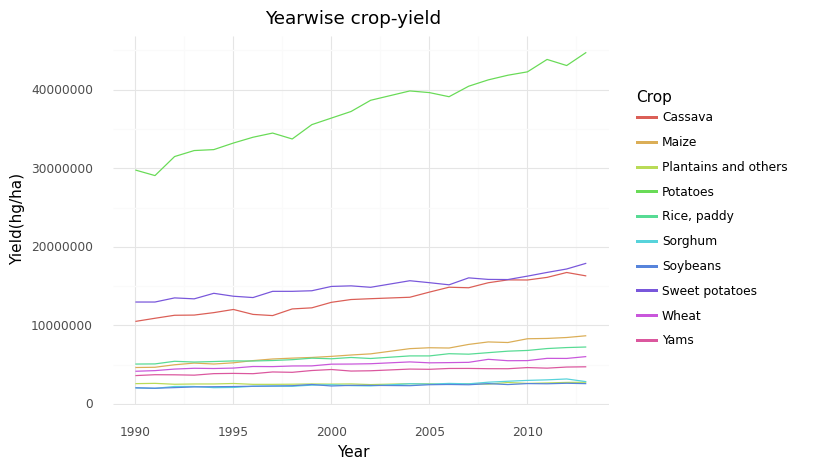

<ggplot: (108978428669)>

In [23]:
#how crop production changed in years
df2 = df.groupby(['Crop','Year'])['yield'].aggregate('sum').reset_index(name='yield') #creating dataframe for crops,yield according to year
ggplot(df2,aes(x='Year', y='yield', colour='Crop')) + geom_line()+theme_minimal()+ labs(title = "Yearwise crop-yield",x = "Year", y = "Yield(hg/ha)")
#ploting of the data using ggplot where in x axis year and in y axis yield are considered and color has been chosen crop-wise

In [24]:
#It can be seen from the above plot that yield of potato has increased drastically followed by sweet potato and yam at the second and the third spot.

#To further explore statistical detail from the barplot for yield for each crop, I further looked at the boxplot to visualize the  yield for each crop.

Text(0.5, 1.0, 'Crop-wise yield boxplot')

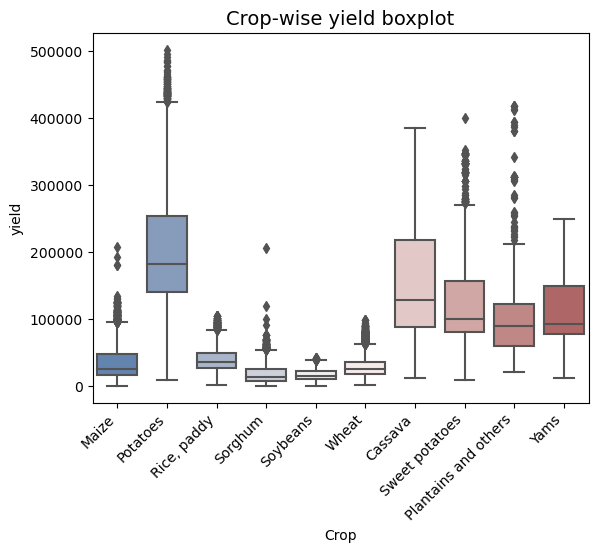

In [25]:
#Box plot, to check the significance of different crops
fig, ax = plt.subplots() 
sns.boxplot(x="Crop",y="yield",palette="vlag",data=df,ax=ax) #box plot of crops
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right') #changing the labels of x axis
ax.set_title('Crop-wise yield boxplot',fontsize = 14)#adding title and frontsize of it

In [26]:
#It can be observed from the boxplot that Potato is the most produced crop in terms of yield followed by Cassava, Sweet potatoes and Yams. Significance will be explored in more detail post model-fitting.

#Lastly, I looked at the country-wise crop-yield. In addition, I also visualized crop- and country-wise yield patterns (top 10).

In [27]:
df_c=df.groupby(['Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')#Country wise total yield
print(df_c)


          Country      Yield
0           India  327420324
1          Brazil  167550306
2          Mexico  130788528
3           Japan  124470912
4       Australia  109111062
5        Pakistan   73897434
6       Indonesia   69193506
7  United Kingdom   55419990
8          Turkey   52263950
9           Spain   46773540


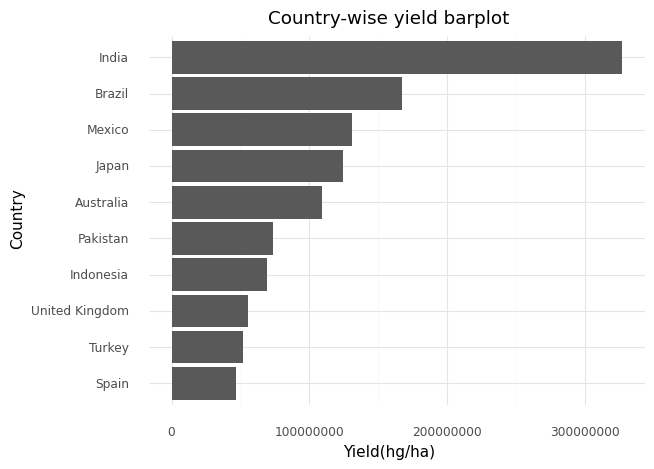

<ggplot: (108978395453)>

In [28]:
p=ggplot(df_c,aes(x='Country',y='Yield'))+ geom_bar(stat = "identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_c['Country'].tolist()[::-1]) #plotting yield and country using ggplot
p+labs(title = "Country-wise yield barplot",x = "Country", y = "Yield(hg/ha)") #adding up title and labels to the x and y axis

In [29]:
print(df.groupby(['Crop','Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')) # 10 highest yield crop and country wise 

             Crop         Country      Yield
0         Cassava           India  142810624
1        Potatoes           India   92122514
2        Potatoes          Brazil   49602168
3        Potatoes  United Kingdom   46705145
4        Potatoes       Australia   45670386
5  Sweet potatoes           India   44439538
6        Potatoes           Japan   42918726
7        Potatoes          Mexico   42053880
8  Sweet potatoes          Mexico   35808592
9  Sweet potatoes       Australia   35550294


In [30]:
#Encoding Categorical Variables:
#There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values

In [31]:
yield_df_onehot = pd.get_dummies(df, columns=['Country',"Crop"], prefix = ['Country',"Crop"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'yield']
label=df['yield']
features.head()

,Year,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# Training data

In [33]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [34]:
df.to_csv('yield_df.csv')

In [35]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [36]:
#Backward Elimination

In [37]:
y = df['yield']
X = df.drop('yield', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

df = df[cols]
df.insert(len(df.columns), 'yield', y)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#smit 

In [47]:
df

,Country,Crop,Year,yield,avg_rain,pesticide,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    28242 non-null  object 
 1   Crop       28242 non-null  object 
 2   Year       28242 non-null  int64  
 3   yield      28242 non-null  int64  
 4   avg_rain   28242 non-null  float64
 5   pesticide  28242 non-null  float64
 6   avg_temp   28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [50]:
df. describe()

,Year,yield,avg_rain,pesticide,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [53]:
df.groupby("Crop").count()

,Country,Year,yield,avg_rain,pesticide,avg_temp
Crop,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [55]:
df.groupby("Crop").mean()

,Year,yield,avg_rain,pesticide,avg_temp
Crop,,,,,
Cassava,2001.445477,150479.466993,1481.128606,44181.307457,24.205756
Maize,2001.553749,36310.070614,1098.124242,32765.983322,19.925159
Plantains and others,2001.507194,106041.320144,1853.928058,7931.009874,24.243543
Potatoes,2001.577877,199801.549579,1060.399205,32152.516104,19.007725
"Rice, paddy",2001.475207,40730.434770,1186.672963,36942.215995,21.265378
Sorghum,2001.635735,18635.777229,1017.179664,36742.457529,21.431586
Soybeans,2001.585479,16731.092771,1110.774744,40752.554896,19.660279
Sweet potatoes,2001.488927,119057.793772,1232.128028,39448.289848,22.178668
Wheat,2001.544724,30116.267825,957.285974,35453.212930,18.131623


In [56]:
from sklearn.preprocessing import OneHotEncoder


In [58]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df)
enc.categories_

[array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
        'Central African Republic', 'Chile', 'Colombia', 'Croatia',
        'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
        'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
        'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
        'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
        'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
        'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
        'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
        'Pakistan', 'Papua New Guinea'

In [60]:
enc.transform(df).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])